In [1]:
"""
--------------------------------------------------------------------------------------------
 Illustration of diversity effects for Rayleigh fading channels

 SER is calculated for M-PSK and M-QAM and Rayleigh fading with different diversity
 degrees, i.i.d. fading amplitudes and MRC
--------------------------------------------------------------------------------------------
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import sys

save_txt = False

D_max = 1000
D = np.arange(1,101)
for run in range(200,D_max+1,100):
    D = np.append(D,run)

EsN0dB_psk = 12
EsN0_psk  = 10**(EsN0dB_psk/10)


# error probability obtained by calculating the moment generating function
# and numerically calculate the integral (result from [Simon, Alouini, 2000])

#--------------------------------------------------------------------------
# M-PSK
#--------------------------------------------------------------------------

MPSK   = 2**np.arange(1,5)
ldMPSK = np.log2(MPSK)

# parameters according to eqn. (1.5.8) a-c in habil manuscript
a = 1 / np.pi

# resolution of integrating variable theta
dtheta = 0.01

Ps_psk = np.zeros((len(D),len(MPSK)))
Ps_psk_awgn = np.zeros(len(MPSK))

for run,m in enumerate(MPSK):
    b = (m-1)/m * np.pi
    c = np.sin(np.pi/m)**2
    theta  = np.arange(dtheta, b, dtheta)
    thetam, Dm = np.meshgrid(theta,D)
    
    # moment generating function
    Ps_psk[:,run] = a * np.sum(1 / (1 + ldMPSK[run]*EsN0_psk / (Dm * np.sin(thetam)**2) * c)**Dm, axis=1) * dtheta

# benchmark curves for pure AWGN channel
Ps_psk_awgn[0] = 0.5 * erfc(np.sqrt(EsN0_psk))   # BPSK
Ps_psk_awgn[1:] = erfc(np.sin(np.pi/MPSK[1:]) * np.sqrt(ldMPSK[1:]*EsN0_psk))


#--------------------------------------------------------------------------
# M-QAM
#--------------------------------------------------------------------------

MQAM   = 2**np.arange(4,9,2)
ldMQAM = np.log2(MQAM)

EsN0dB_qam = 20
EsN0_qam  = 10**(EsN0dB_qam/10)

# parameters according to eqn. (1.5.8) a-c in habil manuscript
b = np.pi/2

# resolution of integrating variable theta
dtheta  = 0.01
theta   = np.arange(dtheta, b, dtheta)
thetam, Dm = np.meshgrid(theta,D)

Ps_qam  = np.zeros((len(D),len(MQAM)))
Ps_qam_awgn = np.zeros(len(MQAM)+1)

for run, m in enumerate(MQAM):
    a = (np.sqrt(m)-1) / np.sqrt(m) * 4 / np.pi
    c = 3 / (m-1) / 2

    # moment generating function
    Ps_qam[:,run] = a * np.sum(1 / (1 + ldMQAM[run]*EsN0_qam / (Dm*np.sin(thetam)**2) * c)**Dm, axis=1) * dtheta

Ps_qam_awgn = (np.sqrt(MQAM)-1) / np.sqrt(MQAM) * 2 *erfc(np.sqrt(3 / (MQAM-1) / 2*EsN0_qam*ldMQAM))


/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_77689/1834182519.py:52: RuntimeWarning: overflow encountered in power
  Ps_psk[:,run] = a * np.sum(1 / (1 + ldMPSK[run]*EsN0_psk / (Dm * np.sin(thetam)**2) * c)**Dm, axis=1) * dtheta
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_77689/1834182519.py:85: RuntimeWarning: overflow encountered in power
  Ps_qam[:,run] = a * np.sum(1 / (1 + ldMQAM[run]*EsN0_qam / (Dm*np.sin(thetam)**2) * c)**Dm, axis=1) * dtheta


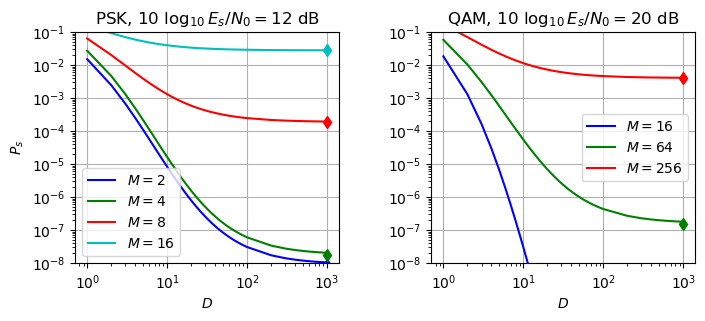

In [5]:
line_styles = ['b','g','r','c','m','y']

fig2 = plt.figure(figsize=(8,3))
plt.subplots_adjust(wspace=0.35)

ax2a = fig2.add_subplot(121)
for run,m in enumerate(MPSK):
    ax2a.loglog(D,Ps_psk[:,run],'-', color=line_styles[run], label='$M=$%d' %(m))
    ax2a.loglog(D_max,Ps_psk_awgn[run],'d',color=line_styles[run])
plt.grid()
plt.ylim(1e-8,0.1)
plt.xlabel('$D$')
plt.ylabel('$P_s$')
plt.legend()
plt.title('PSK, $10 \\ \\log_{10} E_s/N_0 =$%d dB' %(EsN0dB_psk))

ax2b = fig2.add_subplot(122)
for run,m in enumerate(MQAM):
    ax2b.loglog(D,Ps_qam[:,run],'-', color=line_styles[run], label='$M=$%d' %(m))
    ax2b.loglog(D_max,Ps_qam_awgn[run],'d', color=line_styles[run])
plt.grid()
plt.ylim(1e-8,0.1)
plt.xlabel('$D$')
plt.legend()
plt.title('QAM, $10 \\ \\log_{10} E_s/N_0 =$%d dB' %(EsN0dB_qam))


if save_txt:
    erg = np.block([D.reshape((-1,1)), Ps_psk])
    string = 'D '
    for run in MPSK:
        string += 'M' + str(run) + ' '
    np.savetxt('Results/part2_diversity_psk_SNR' + str(EsN0dB_psk) + '_D.txt',erg,header=string,comments='')

    erg = np.block([D.reshape((-1,1)), Ps_qam])
    string = 'D '
    for run in MQAM:
        string += 'M' + str(run) + ' '
    np.savetxt('Results/part2_diversity_qam_SNR' + str(EsN0dB_qam) + '_D.txt',erg,header=string,comments='')


In [3]:
EsN0dB = np.arange(31)
EsN0  = 10**(EsN0dB/10)

D2 = np.arange(1,6)
D2 = np.append(D2,10)
D2 = np.append(D2,100)

# error probability obtained by calculating the moment generating function
# and numerically calculate the integral (result from [Simon, Alouini, 2000])

#--------------------------------------------------------------------------
# M-PSK
#--------------------------------------------------------------------------

M   = 16
ldM = np.log2(M)

# parameters according to eqn. (1.5.8) a-c in habil manuscript
a = 1 / np.pi
b = (M-1)/M * np.pi
c = np.sin(np.pi/M)**2

# resolution of integrating variable theta
dtheta = 0.01
theta  = np.arange(dtheta, b, dtheta)

thetam, SNRm = np.meshgrid(theta,EsN0)

Ps_psk_snr = np.zeros((len(D2),len(EsN0dB)))

for run,d in enumerate(D2):
    Ps_psk_snr[run,:] = a * np.sum(1 / (1 + ldM*SNRm / (d * np.sin(thetam)**2) * c)**d, axis=1) * dtheta

Ps_psk_awgn_snr = erfc(np.sin(np.pi/M) * np.sqrt(ldM*EsN0))

#--------------------------------------------------------------------------
# M-QAM
#--------------------------------------------------------------------------

# parameters according to eqn. (1.5.8) a-c in habil manuscript
a = (np.sqrt(M)-1) / np.sqrt(M) * 4 / np.pi
b = np.pi/2
c = 3 / (M-1) / 2

# resolution of integrating variable theta
dtheta  = 0.01
theta   = np.arange(dtheta, b, dtheta)
thetam, SNRm = np.meshgrid(theta,EsN0)

Ps_qam_snr  = np.zeros((len(D2),len(EsN0dB)))

for run, d in enumerate(D2):
    Ps_qam_snr[run,:] = a * np.sum(1 / (1 + ldM*SNRm / (d * np.sin(thetam)**2) * c)**d, axis=1) * dtheta

Ps_qam_awgn_snr = (np.sqrt(M)-1) / np.sqrt(M) * 2 *erfc(np.sqrt(3 / (M-1) / 2*EsN0*ldM))


/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_77689/514177226.py:32: RuntimeWarning: overflow encountered in power
  Ps_psk_snr[run,:] = a * np.sum(1 / (1 + ldM*SNRm / (d * np.sin(thetam)**2) * c)**d, axis=1) * dtheta
/var/folders/jq/3mc3rmqn4zb76l6_gjt5w7xw0000gn/T/ipykernel_77689/514177226.py:53: RuntimeWarning: overflow encountered in power
  Ps_qam_snr[run,:] = a * np.sum(1 / (1 + ldM*SNRm / (d * np.sin(thetam)**2) * c)**d, axis=1) * dtheta


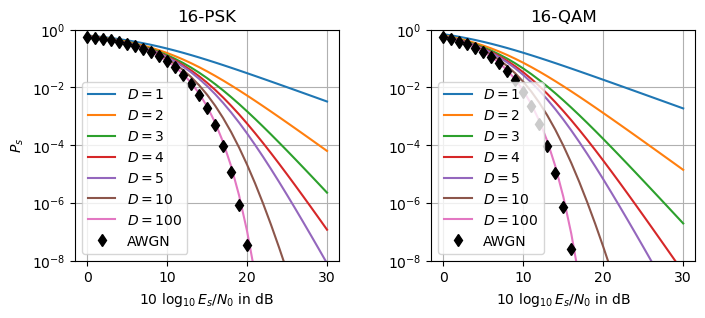

In [6]:
fig2 = plt.figure(figsize=(8,3))
plt.subplots_adjust(wspace=0.35)

ax2a = fig2.add_subplot(121)
for run,d in enumerate(D2):
    ax2a.semilogy(EsN0dB,Ps_psk_snr[run,:],'-', label='$D=$%d' %(d))
ax2a.semilogy(EsN0dB,Ps_psk_awgn_snr,'kd', label='AWGN')
plt.grid()
plt.ylim(1e-8,1)
plt.xlabel('$10 \\ \\log_{10} E_s/N_0$ in dB')
plt.ylabel('$P_s$')
plt.legend()
plt.title('%d-PSK' %(M))

ax2b = fig2.add_subplot(122)
for run,d in enumerate(D2):
    ax2b.semilogy(EsN0dB,Ps_qam_snr[run,:],'-', label='$D=$%d' %(d))
ax2b.semilogy(EsN0dB,Ps_qam_awgn_snr,'kd', label='AWGN')
plt.grid()
plt.ylim(1e-8,1)
plt.xlabel('$10 \\ \\log_{10} E_s/N_0$ in dB')
plt.legend()
plt.title('%d-QAM' %(M))


if save_txt:
    erg = np.block([EsN0dB.reshape((-1,1)), Ps_psk_snr.T, Ps_psk_awgn_snr.reshape((-1,1))])
    string = 'SNRdB '
    for run in D2:
        string += 'D' + str(run) + ' '
    string += 'AWGN'
    np.savetxt('Results/part2_diversity_' + str(M) + 'psk_SNR.txt',erg,header=string,comments='')

    erg = np.block([EsN0dB.reshape((-1,1)), Ps_qam_snr.T, Ps_qam_awgn_snr.reshape((-1,1))])
    string = 'SNRdB '
    for run in D2:
        string += 'D' + str(run) + ' '
    string += 'AWGN'
    np.savetxt('Results/part2_diversity_' + str(M) + 'qam_SNR.txt',erg,header=string,comments='')
